In [1]:
from IPython.core.display import HTML
HTML("""
<style>
h1.head{
    background-color: #5F9EA0;
    font-weight:bold;
    font-size:30px;
    text-align: center
    
}
p.summary{
    background-color: #E7DCA4;
    font-weight:bold;
    font-size:20px;
}
h3.bold{
text-align: left;
    font-weight: bold;
    font-size:20px;
}
</style>
""")

In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 13.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=1f96ccc498cd27d28a9a6ff1eaebe29d332cdca991039967ae83c10bc72a10c0
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
Note: you may need to restart the kernel to use updated packages.


<h1 class=head>SALES REPORT USING SPARK SQL</h1>

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
if __name__ == '__main__':
    scSpark = SparkSession \
        .builder \
        .appName("reading csv") \
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/29 14:29:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
path = '/kaggle/input/retails-database/'
customer_sdf = scSpark.read.csv(path+'customers.csv', header=True, sep=",").cache()
orders_sdf = scSpark.read.csv(path+'orders.csv', header=True, sep=",").cache()
orders_item_sdf = scSpark.read.csv(path+'orders_items.csv', header=True, sep=",").cache()
products_sdf = scSpark.read.csv(path+'products.csv', header=True, sep=",").cache()
departments_sdf = scSpark.read.csv(path+'departments.csv', header=True, sep=",").cache()
categories_sdf = scSpark.read.csv(path+'categories.csv', header=True, sep=",").cache()

In [6]:
customer_sdf.registerTempTable("customers")
orders_sdf.registerTempTable("orders")
orders_item_sdf.registerTempTable("orders_items")
products_sdf.registerTempTable("products")
departments_sdf.registerTempTable("departments")
categories_sdf.registerTempTable("categories")

/opt/conda/lib/python3.7/site-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [7]:
output =  scSpark.sql('SELECT min(order_date), max(order_date) from orders')
output.show()


+-------------------+-------------------+
|    min(order_date)|    max(order_date)|
+-------------------+-------------------+
|2013-07-25 00:00:00|2014-07-24 00:00:00|
+-------------------+-------------------+



In [8]:
output =  scSpark.sql('SELECT * from orders')
output.show()


+--------+-------------------+-----------------+------------+
|order_id|         order_date|order_customer_id|order_status|
+--------+-------------------+-----------------+------------+
|    4068|2013-08-17 00:00:00|            12293|     PENDING|
|    7564|2013-09-09 00:00:00|             8648|      CLOSED|
|    8926|2013-09-19 00:00:00|            10517|     ON_HOLD|
|    9793|2013-09-24 00:00:00|             9809|    COMPLETE|
|   13733|2013-10-18 00:00:00|            11159|    COMPLETE|
|   14047|2013-10-20 00:00:00|             6473|      CLOSED|
|   14256|2013-10-23 00:00:00|             4099|     PENDING|
|   14387|2013-10-23 00:00:00|             3369|    COMPLETE|
|   19552|2013-11-23 00:00:00|             7057|     ON_HOLD|
|   20471|2013-11-29 00:00:00|             9957|    COMPLETE|
|   24016|2013-12-21 00:00:00|              604|    COMPLETE|
|   24408|2013-12-23 00:00:00|             5799|      CLOSED|
|   24626|2013-12-24 00:00:00|            12122|     ON_HOLD|
|   2506

In [9]:
output =  scSpark.sql('SELECT * from orders_items')
output.show(3)


+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|order_item_id|order_item_order_id|order_item_product_id|order_item_quantity|order_item_subtotal|order_item_product_price|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|            1|                  1|                  957|                  1|             299.98|                  299.98|
|            2|                  2|                 1073|                  1|             199.99|                  199.99|
|            3|                  2|                  502|                  5|                250|                      50|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
only showing top 3 rows



In [10]:
output =  scSpark.sql('SELECT * from products')
output.show(3)


+----------+-------------------+--------------------+-------------------+-------------+--------------------+
|product_id|product_category_id|        product_name|product_description|product_price|       product_image|
+----------+-------------------+--------------------+-------------------+-------------+--------------------+
|         1|                  2|Quest Q64 10 FT. ...|               null|        59.98|http://images.acm...|
|         2|                  2|Under Armour Men'...|               null|       129.99|http://images.acm...|
|         3|                  2|Under Armour Men'...|               null|        89.99|http://images.acm...|
+----------+-------------------+--------------------+-------------------+-------------+--------------------+
only showing top 3 rows



<p class=summary> Question 1: Imaging that you need to list all top 20 products based on Volume and Value</p>

In [11]:
output_re =  scSpark.sql("select distinct (product_id), product_name, sum(order_item_subtotal) over (partition by product_id) as revenue, sum(order_item_quantity) over (partition by product_id) as quantity from ( SELECT p.product_id, p.product_name, oi.order_item_subtotal, oi.order_item_quantity from orders o inner join orders_items oi on o.order_id=oi.order_item_order_id inner join products p on oi.order_item_product_id = p.product_id where o.order_status = 'CLOSED' or o.order_status = 'COMPLETE') a order by revenue desc limit 10" )
output_re.show(20)

+----------+--------------------+------------------+--------+
|product_id|        product_name|           revenue|quantity|
+----------+--------------------+------------------+--------+
|      1004|Field & Stream Sp...|3022248.8799998746|  7556.0|
|       365|Perfect Fitness P...| 1929578.349999777| 32165.0|
|       957|Diamondback Women...|1802879.7999999083|  6010.0|
|       191|Nike Men's Free 5...|1627337.2499998945| 16275.0|
|       502|Nike Men's Dri-FI...|         1387000.0| 27740.0|
|      1073|Pelican Sunstream...|1337533.1199999454|  6688.0|
|       403|Nike Men's CJ Eli...|1278971.6099999202|  9839.0|
|      1014|O'Brien Men's Neo...|1257646.7399998906| 25163.0|
|       627|Under Armour Girl...| 551861.9999999838| 13800.0|
|       728|LIJA Women's Eyel...|           27820.0|   428.0|
+----------+--------------------+------------------+--------+



Text(0, 0.5, 'Volume')

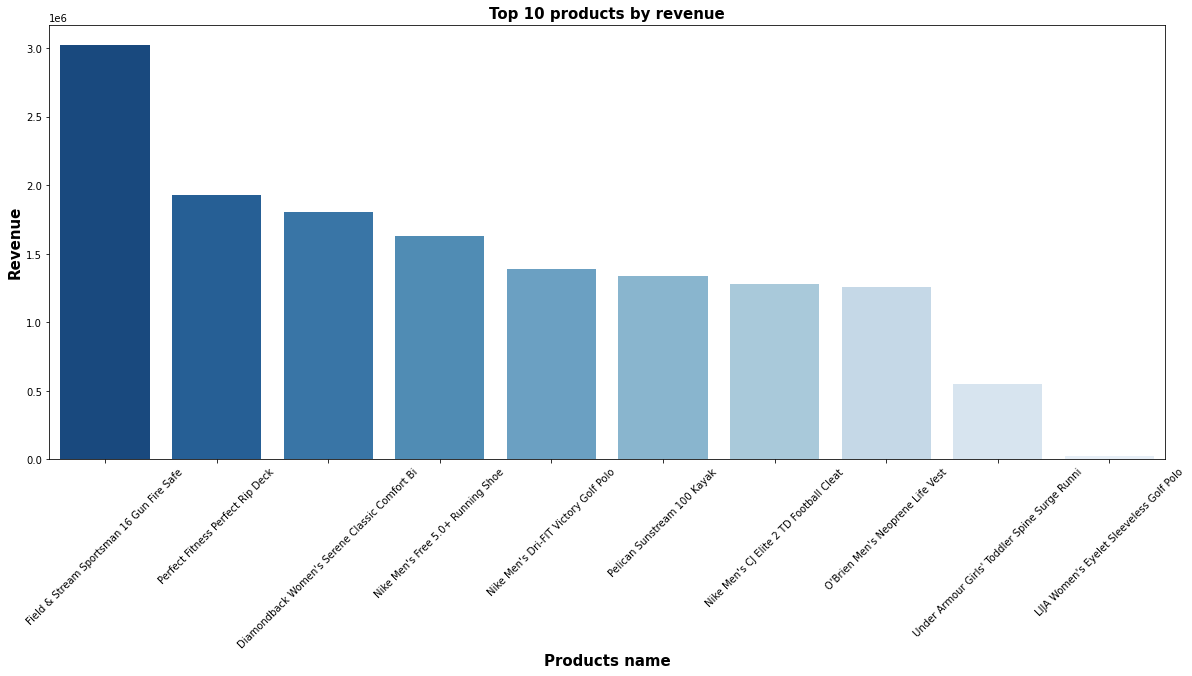

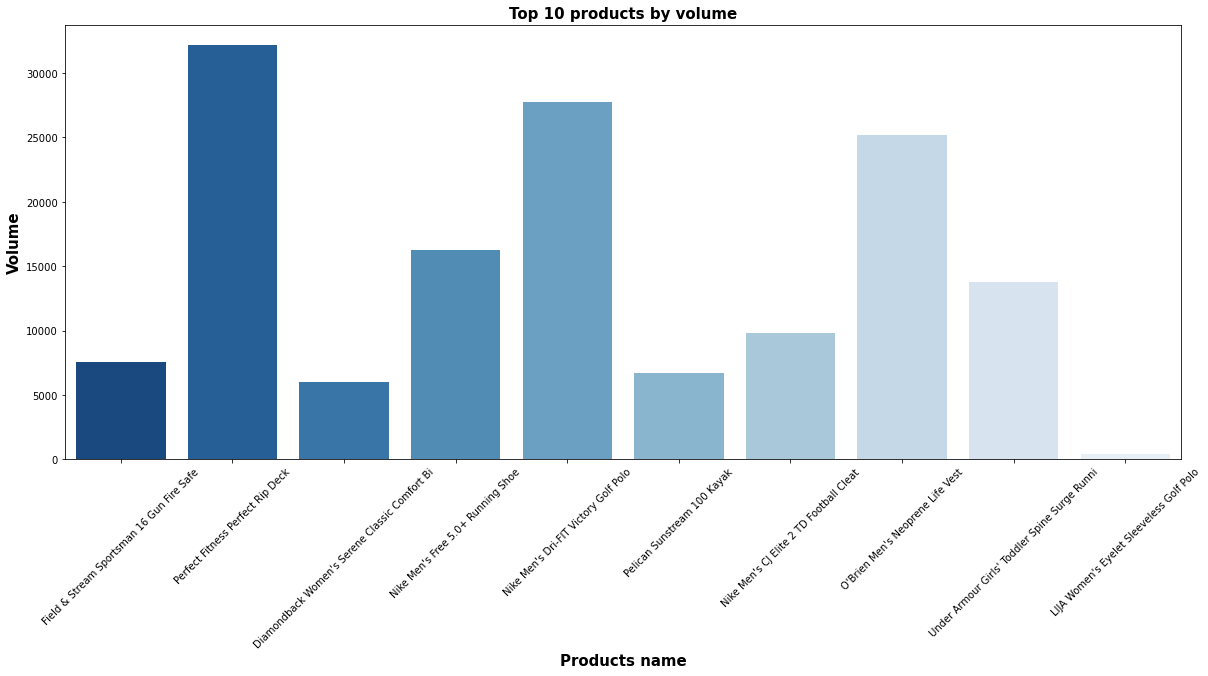

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.barplot(data=output_re.toPandas(), x='product_name', y='revenue', palette='Blues_r')
plt.xticks(rotation='45')
plt.title('Top 10 products by revenue', fontsize=15, fontweight='bold')
plt.xlabel('Products name', fontsize=15, fontweight='bold')
plt.ylabel('Revenue', fontsize=15, fontweight='bold')
plt.figure(figsize=(20,8))
sns.barplot(data=output_re.toPandas(), x='product_name', y='quantity', palette='Blues_r')
plt.xticks(rotation='45')
plt.title('Top 10 products by volume', fontsize=15, fontweight='bold')
plt.xlabel('Products name', fontsize=15, fontweight='bold')
plt.ylabel('Volume', fontsize=15, fontweight='bold')

<p class=summary> Question 2: Now you need to calculate Value monthly</p>

In [13]:
scSpark.sql("select * from orders_items " ).show(2)

+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|order_item_id|order_item_order_id|order_item_product_id|order_item_quantity|order_item_subtotal|order_item_product_price|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|            1|                  1|                  957|                  1|             299.98|                  299.98|
|            2|                  2|                 1073|                  1|             199.99|                  199.99|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
only showing top 2 rows



In [14]:
output_re =  scSpark.sql("select distinct(month), sum(total_per_order) over (partition by month) as total from (select o.order_id, MONTH(o.order_date) as month, sum(oi.order_item_subtotal) over (partition by order_item_order_id) as total_per_order  from orders o inner join orders_items oi on o.order_id = oi.order_item_order_id where o.order_status='CLOSE' or o.order_status='COMPLETE') a" )
output_re.show(20)

+-----+------------------+
|month|             total|
+-----+------------------+
|    1|3390531.9100000304|
|    2|3362303.6200000034|
|    3|3553876.4400000414|
|    4| 3507645.040000028|
|    5|3428099.1500000004|
|    6|3320552.4000000185|
|    7|3479247.6800000095|
|    8| 3344210.150000021|
|    9| 3544574.410000024|
|   10| 3168385.450000018|
|   11|3782961.9400000465|
|   12|3414829.8100000075|
+-----+------------------+



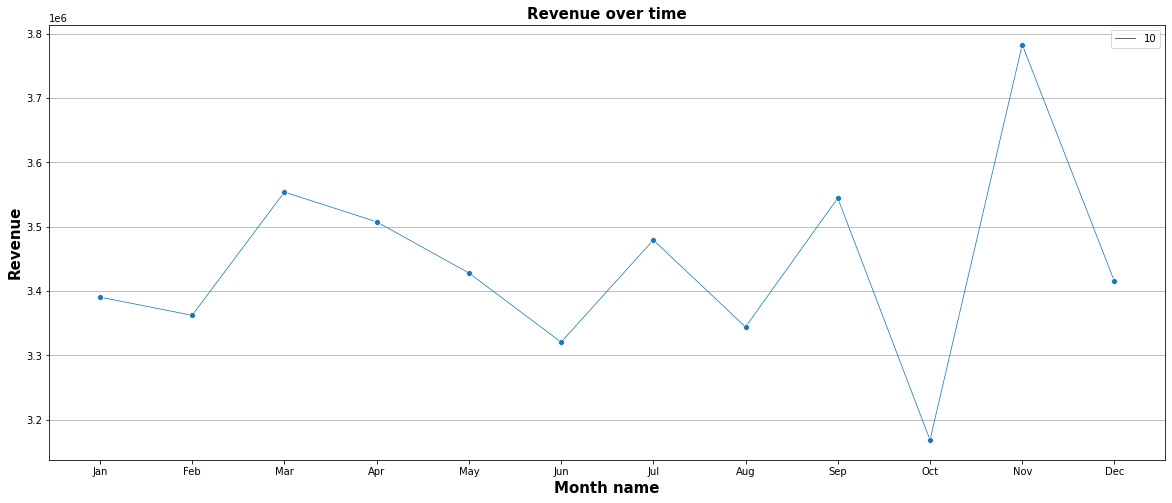

In [15]:
import numpy as np

plt.figure(figsize=(20,8))
p=sns.lineplot(data=output_re.toPandas(), x='month', y='total', marker='o', palette='Oranges', size=10)
plt.xticks(np.arange(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] )
plt.title('Revenue over time', fontsize=15, fontweight='bold')
plt.xlabel('Month name', fontsize=15, fontweight='bold')
plt.ylabel('Revenue', fontsize=15, fontweight='bold')
plt.grid(axis='y')

<p class=summary> Question 3: Now you need to calculate total Volume and Value based on Customer state</p>

In [16]:
scSpark.sql('select * from orders_items limit 10').show(3)

+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|order_item_id|order_item_order_id|order_item_product_id|order_item_quantity|order_item_subtotal|order_item_product_price|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|            1|                  1|                  957|                  1|             299.98|                  299.98|
|            2|                  2|                 1073|                  1|             199.99|                  199.99|
|            3|                  2|                  502|                  5|                250|                      50|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
only showing top 3 rows



In [17]:
output_re =  scSpark.sql("select distinct(o.order_id), c.customer_state as state, sum(oi.order_item_subtotal) over (partition by oi.order_item_order_id) as total from customers c inner join orders o on c.customer_id=o.order_customer_id inner join orders_items oi on o.order_id = oi.order_item_order_id where o.order_status = 'CLOSED' or o.order_status='COMPLETE' " )
output_re.show(20)

+--------+-----+-----------------+
|order_id|state|            total|
+--------+-----+-----------------+
|   10373|   PR|           369.88|
|   11171|   CA|           399.98|
|   11764|   PR|          1149.81|
|   12052|   PR|          1029.94|
|   12093|   PR|            150.0|
|   12578|   PR|           239.96|
|   12915|   CA|719.9300000000001|
|   13330|   NY|          1189.92|
|   13959|   PR|           129.99|
|   14025|   CA|           749.97|
|   14170|   CA|           344.93|
|   14452|   VA|           699.96|
|   15495|   CA|           699.96|
|   15706|   NJ|           939.86|
|   15711|   PR|799.9200000000001|
|   16494|   MI|           229.99|
|   17966|   IL|879.9000000000001|
|   18135|   IL|            884.8|
|   18207|   PR|          1129.89|
|   19191|   OH|            321.9|
+--------+-----+-----------------+
only showing top 20 rows



In [18]:
output_re =  scSpark.sql("select distinct(state) , sum(total) over (partition by state) as total from (select distinct(o.order_id), c.customer_state as state, sum(oi.order_item_subtotal) over (partition by oi.order_item_order_id) as total from customers c inner join orders o on c.customer_id=o.order_customer_id inner join orders_items oi on o.order_id = oi.order_item_order_id where o.order_status = 'CLOSED' or o.order_status='COMPLETE' ) a order by total desc" )
output_re.show(20)

+-----+------------------+
|state|             total|
+-----+------------------+
|   PR| 5758091.950000326|
|   CA| 2424976.669999968|
|   NY|  915059.079999993|
|   TX| 779968.1999999965|
|   IL| 662863.7399999985|
|   FL| 458690.1499999992|
|   OH|327291.36000000004|
|   MI|         320656.48|
|   PA|316417.55999999965|
|   NJ|261648.80000000028|
|   AZ|249297.90000000014|
|   MD| 209627.2700000002|
|   GA|193311.02000000016|
|   NC|167305.09000000026|
|   CO|157499.55999999994|
|   VA| 150922.7600000001|
|   OR|141602.09000000014|
|   MA|132347.71999999994|
|   NV|129486.85000000002|
|   TN|         119820.81|
+-----+------------------+
only showing top 20 rows



Text(0, 0.5, 'Revenue')

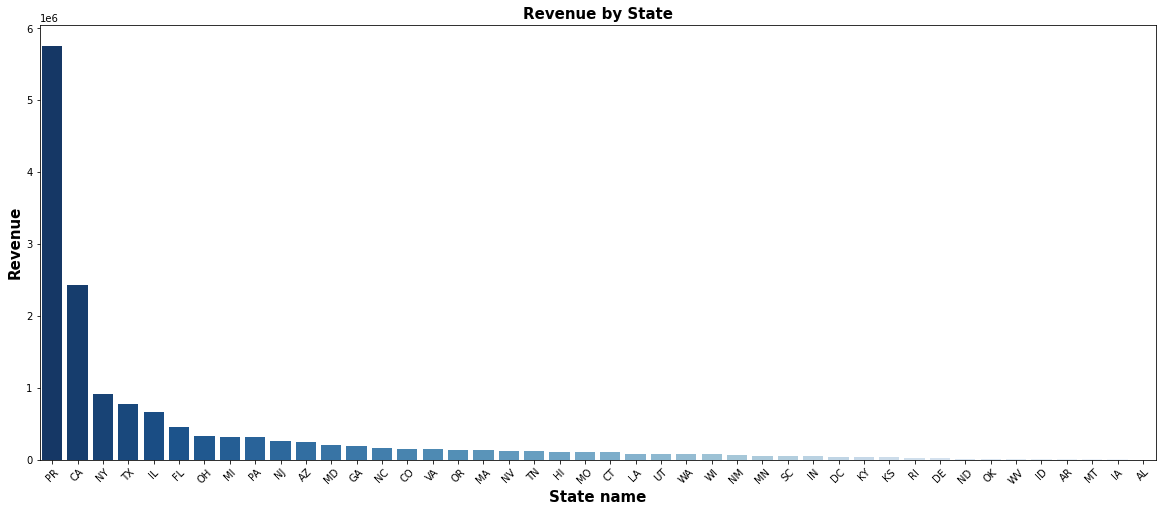

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(data=output_re.toPandas(), x='state', y='total', palette='Blues_r')
plt.xticks(rotation='45')
plt.title('Revenue by State', fontsize=15, fontweight='bold')
plt.xlabel('State name', fontsize=15, fontweight='bold')
plt.ylabel('Revenue', fontsize=15, fontweight='bold')

<p class=summary> Question 4: Now you need to calculate total Volume and Value based on Categories</p>

In [20]:
scSpark.sql('select * from products').show(3)

+----------+-------------------+--------------------+-------------------+-------------+--------------------+
|product_id|product_category_id|        product_name|product_description|product_price|       product_image|
+----------+-------------------+--------------------+-------------------+-------------+--------------------+
|         1|                  2|Quest Q64 10 FT. ...|               null|        59.98|http://images.acm...|
|         2|                  2|Under Armour Men'...|               null|       129.99|http://images.acm...|
|         3|                  2|Under Armour Men'...|               null|        89.99|http://images.acm...|
+----------+-------------------+--------------------+-------------------+-------------+--------------------+
only showing top 3 rows



In [21]:
scSpark.sql('select * from orders_items').show(3)

+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|order_item_id|order_item_order_id|order_item_product_id|order_item_quantity|order_item_subtotal|order_item_product_price|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
|            1|                  1|                  957|                  1|             299.98|                  299.98|
|            2|                  2|                 1073|                  1|             199.99|                  199.99|
|            3|                  2|                  502|                  5|                250|                      50|
+-------------+-------------------+---------------------+-------------------+-------------------+------------------------+
only showing top 3 rows



In [22]:
scSpark.sql('select * from categories').show(3)

+-----------+----------------------+-------------------+
|category_id|category_department_id|      category_name|
+-----------+----------------------+-------------------+
|          1|                     2|           Football|
|          2|                     2|             Soccer|
|          3|                     2|Baseball & Softball|
+-----------+----------------------+-------------------+
only showing top 3 rows



In [23]:
output = scSpark.sql("select distinct(p.product_name), c.category_id, c.category_name, sum(oi.order_item_subtotal) over (partition by oi.order_item_product_id) as revenue_per_product from orders o inner join orders_items oi on o.order_id = oi.order_item_order_id inner join products p on oi.order_item_product_id = p.product_id inner join categories c on p.product_category_id=c.category_id where o.order_status='CLOSE' or o.order_status='COMPLETE'")
output.show(5)

+--------------------+-----------+--------------------+-------------------+
|        product_name|category_id|       category_name|revenue_per_product|
+--------------------+-----------+--------------------+-------------------+
|Titleist Pro V1 H...|         37|         Electronics|  15337.04999999998|
|Polar Loop Activi...|         38|    Kids' Golf Clubs| 2089.0500000000006|
|Nike Kids' Grade ...|          5|            Lacrosse|  5699.429999999999|
|Team Golf Pittsbu...|         40|         Accessories|  7871.849999999995|
|O'Brien Men's Neo...|         46|Indoor/Outdoor Games|  947970.6599999758|
+--------------------+-----------+--------------------+-------------------+
only showing top 5 rows



In [24]:
output = scSpark.sql("select distinct(category_name), sum(revenue_per_product) over (partition by category_id) as revenue_by_cat from (select distinct(p.product_name), c.category_id, c.category_name, sum(oi.order_item_subtotal) over (partition by oi.order_item_product_id) as revenue_per_product from orders o inner join orders_items oi on o.order_id = oi.order_item_order_id inner join products p on oi.order_item_product_id = p.product_id inner join categories c on p.product_category_id=c.category_id where o.order_status='CLOSE' or o.order_status='COMPLETE') a order by revenue_by_cat desc")
output.show()

+--------------------+------------------+
|       category_name|    revenue_by_cat|
+--------------------+------------------+
|             Fishing|  2257887.09999991|
|              Cleats|1465736.2299998498|
|    Camping & Hiking|1355009.6599999361|
|    Cardio Equipment|1214859.4199999336|
|     Women's Apparel|         1046600.0|
|        Water Sports|1001749.9999999612|
|      Men's Footwear| 957896.3099999431|
|Indoor/Outdoor Games| 947970.6599999758|
|       Shop By Sport| 430995.2599999957|
|         Electronics|  85012.0999999999|
|      Girls' Apparel| 46427.26999999999|
|         Accessories| 45031.97999999996|
|          Golf Shoes|           39964.0|
|         Electronics| 38069.91999999997|
|         Golf Gloves|36215.899999999965|
|    Kids' Golf Clubs|          31853.43|
|   Strength Training|          30957.73|
| Baseball & Softball|28854.389999999978|
|        Boxing & MMA|27900.489999999994|
|          Golf Balls|25339.559999999972|
+--------------------+------------

Text(0, 0.5, 'Revenue')

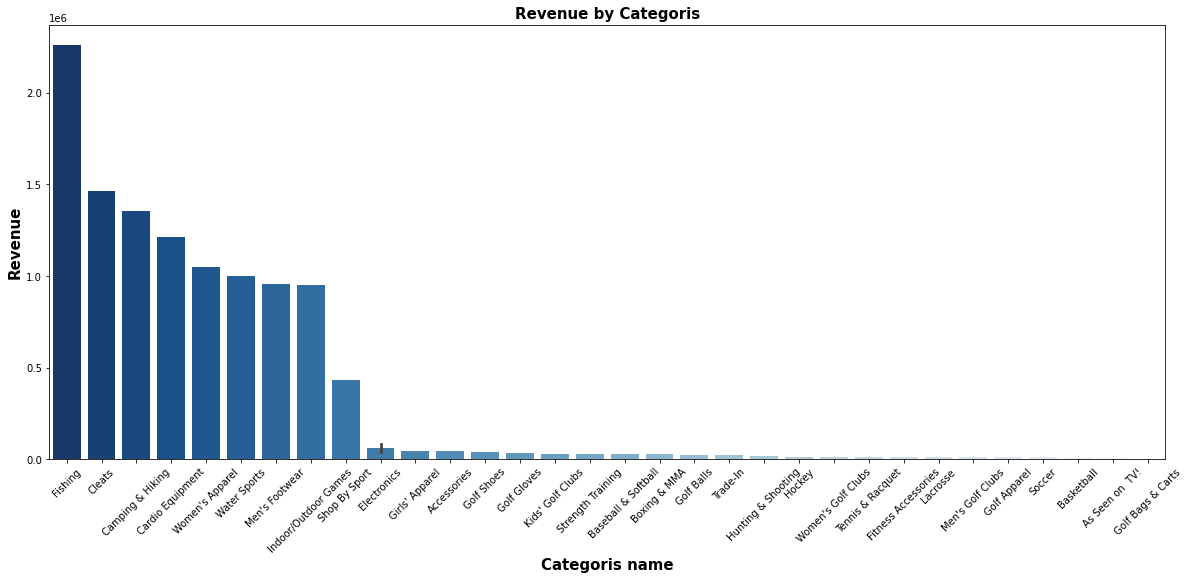

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(data=output.toPandas(), x='category_name', y='revenue_by_cat', palette='Blues_r')
plt.xticks(rotation='45')
plt.title('Revenue by Categoris', fontsize=15, fontweight='bold')
plt.xlabel('Categoris name', fontsize=15, fontweight='bold')
plt.ylabel('Revenue', fontsize=15, fontweight='bold')

<p class=summary>Question 5: Now you need to choose top 20 customers by Value from each categories of goods to give them some gifts </p>

In [26]:
output = scSpark.sql('select * from customers limit 10')
output.show(3)

+-----------+--------------+--------------+--------------+-----------------+--------------------+-------------+--------------+----------------+
|customer_id|customer_fname|customer_lname|customer_email|customer_password|     customer_street|customer_city|customer_state|customer_zipcode|
+-----------+--------------+--------------+--------------+-----------------+--------------------+-------------+--------------+----------------+
|          1|       Richard|     Hernandez|     XXXXXXXXX|        XXXXXXXXX|  6303 Heather Plaza|  Brownsville|            TX|           78521|
|          2|          Mary|       Barrett|     XXXXXXXXX|        XXXXXXXXX|9526 Noble Embers...|    Littleton|            CO|           80126|
|          3|           Ann|         Smith|     XXXXXXXXX|        XXXXXXXXX|3422 Blue Pioneer...|       Caguas|            PR|           00725|
+-----------+--------------+--------------+--------------+-----------------+--------------------+-------------+--------------+----------

In [27]:
output = scSpark.sql("select distinct(oi.order_item_order_id) as order_id, c.customer_id,   concat(c.customer_fname, ' ', c.customer_lname) as customer_name, sum(oi.order_item_subtotal) over (partition by oi.order_item_order_id) as revenue_by_order from customers c inner join orders o on c.customer_id = o.order_customer_id inner join orders_items oi on o.order_id = oi.order_item_order_id where o.order_status='CLOSED' or o.order_status='COMPLETE'")
output.show(3)

+--------+-----------+-------------+----------------+
|order_id|customer_id|customer_name|revenue_by_order|
+--------+-----------+-------------+----------------+
|   10821|       5404|Sara Castillo|         1219.89|
|   10887|        577|   Mary Smith|           27.99|
|   11477|       4122|   Mary Smith|          295.97|
+--------+-----------+-------------+----------------+
only showing top 3 rows



In [28]:
output = scSpark.sql("select distinct(customer_id), customer_name, sum(revenue_by_order) over (partition by customer_id) as revenue from (select distinct(oi.order_item_order_id) as order_id, c.customer_id,   concat(c.customer_fname, ' ', c.customer_lname) as customer_name, sum(oi.order_item_subtotal) over (partition by oi.order_item_order_id) as revenue_by_order from customers c inner join orders o on c.customer_id = o.order_customer_id inner join orders_items oi on o.order_id = oi.order_item_order_id where o.order_status='CLOSED' or o.order_status='COMPLETE') a order by revenue desc limit 20")
output.show(3)

+-----------+-------------+-----------------+
|customer_id|customer_name|          revenue|
+-----------+-------------+-----------------+
|       9337|   Mary Smith|6585.330000000001|
|       3710| Ashley Smith|6169.400000000001|
|       2723|   Mary Brady|6159.250000000001|
+-----------+-------------+-----------------+
only showing top 3 rows



Text(0, 0.5, 'Revenue')

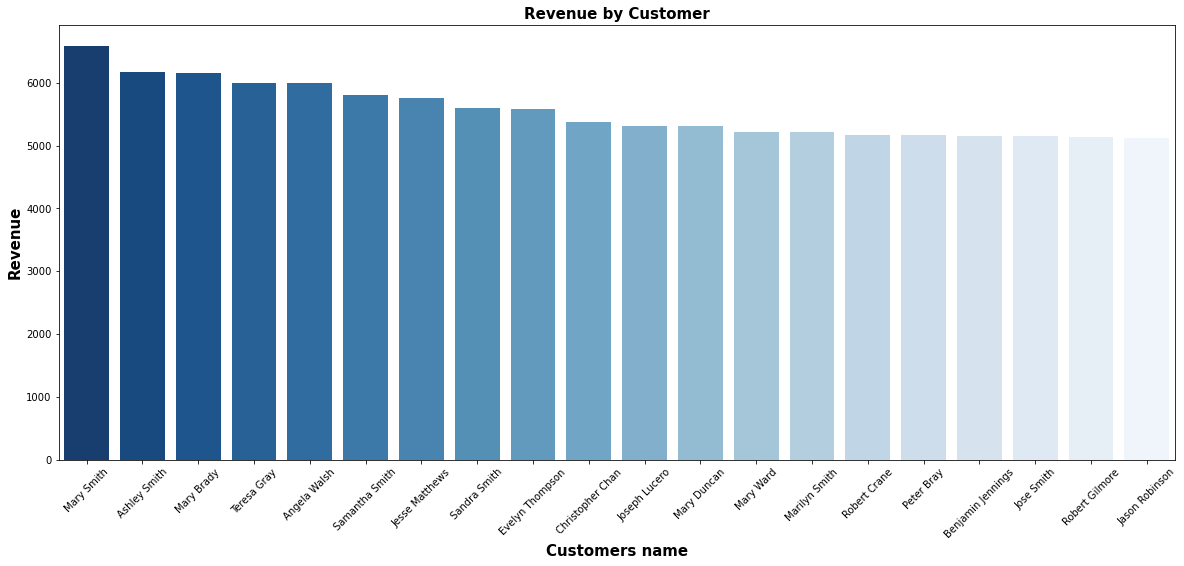

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(data=output.toPandas(), x='customer_name', y='revenue', palette='Blues_r')
plt.xticks(rotation='45')
plt.title('Revenue by Customer', fontsize=15, fontweight='bold')
plt.xlabel('Customers name', fontsize=15, fontweight='bold')
plt.ylabel('Revenue', fontsize=15, fontweight='bold')

<h1 class=head>SOME EXAMPLE OF DATA CLEANING USING SPARK</h1>

In [127]:
from pyspark.shell import sqlContext
from pyspark.sql.types import *
from pyspark.sql import SparkSession
import pandas as pd

spark = SparkSession.builder.appName(
  "pandas to spark").getOrCreate()

schema = StructType([StructField("ID", IntegerType(), True)\
        ,StructField("Noi_dung", StringType(), True)\
                     ,StructField("Dia_chi", StringType(), True)\
                     ,StructField("Gia", IntegerType(), True)\
                     ,StructField("Nha_ve_sinh", IntegerType(), True)\
                     ,StructField("So_phong", IntegerType(), True)\
                     ,StructField("Huong", StringType(), True)\
                     ,StructField("Chieu_dai", DoubleType(), True)\
                     ,StructField("Rong", DoubleType(), True)\
                      ,StructField("Giay_to", StringType(), True)\
                     ,StructField("Cau_truc", StringType(), True)\
                     ,StructField("Dien_tich", DoubleType(), True)\
                     ,StructField("Dien_tich_su_dung", DoubleType(), True)\
                     ,StructField("Hem_rong", DoubleType(), True)\
                     ,StructField("Duong_mat_tien", IntegerType(), True)\
                     ,StructField("Tien_ich", StringType(), True)\
                     ,StructField("Duong", StringType(), True)\
                     ,StructField("Phuong", StringType(), True)\
                     ,StructField("Quan", StringType(), True)\
                     
                   
                     
                     
                     
                     
                     
                     
                     
#                      ,StructField("Dien_tich", IntegerType(), True)\
                     
                   ])

df = pd.read_excel('/kaggle/input/housing-dataset/House_data.xlsx')
pdf = spark.createDataFrame(df, schema=schema)

23/01/29 15:17:25 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [128]:
pdf.show(3)

+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+
|    ID|            Noi_dung|             Dia_chi| Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|         Duong|     Phuong|         Quan|
+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...|3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|             0|Gần chợ, siêu thị...| ấp thới tây 2|Xã Tân Hiệp|Huyện Hóc Môn|
|205270|Bán Nhà Hẻm Đường...|Đường H

In [129]:
from pyspark.sql.functions import *#col,isnan, when, count, split,regexp_extract, udf,expr, regexp_replace

<h3 style='color:orange'>Count Null Values</h3>

In [130]:
null_counts = pdf.select([(count(when(isnan(c)|col(c).isNull(),c))/pdf.count()*100).alias(c) for c in pdf.columns])
null_counts.show()

+---+--------+-------+---+-----------+--------+-----+---------+----+-------+--------+---------+-----------------+--------+--------------+-----------------+-----+------+----+
| ID|Noi_dung|Dia_chi|Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|         Tien_ich|Duong|Phuong|Quan|
+---+--------+-------+---+-----------+--------+-----+---------+----+-------+--------+---------+-----------------+--------+--------------+-----------------+-----+------+----+
|0.0|     0.0|    0.0|0.0|        0.0|     0.0|  0.0|      0.0| 0.0|    0.0|     0.0|      0.0|              0.0|     0.0|           0.0|18.97316219369895|  0.0|   0.0| 0.0|
+---+--------+-------+---+-----------+--------+-----+---------+----+-------+--------+---------+-----------------+--------+--------------+-----------------+-----+------+----+



In [131]:
pdf=pdf.select([when(col(c)=="",None).otherwise(col(c)).alias(c) for c in pdf.columns])
pdf.show()

+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+
|    ID|            Noi_dung|             Dia_chi|  Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|             Duong|              Phuong|           Quan|
+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...| 3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|             0|Gần chợ, siêu thị...|     ấp thới tây 2|         X

In [132]:
# Dict_Null = {col:pdf.filter(pdf[col].isNull()).count() for col in pdf.columns}
# Dict_Null

In [133]:
null_counts = pdf.select([(count(when(isnan(c)|col(c).isNull(),c))/pdf.count()*100).alias(c) for c in pdf.columns])
null_counts.show()

+---+--------+-------+---+-----------+--------+-----+---------+----+-------+--------+---------+-----------------+--------+--------------+-----------------+-----+------+----+
| ID|Noi_dung|Dia_chi|Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|         Tien_ich|Duong|Phuong|Quan|
+---+--------+-------+---+-----------+--------+-----+---------+----+-------+--------+---------+-----------------+--------+--------------+-----------------+-----+------+----+
|0.0|     0.0|    0.0|0.0|        0.0|     0.0|  0.0|      0.0| 0.0|    0.0|     0.0|      0.0|              0.0|     0.0|           0.0|18.97316219369895|  0.0|   0.0| 0.0|
+---+--------+-------+---+-----------+--------+-----+---------+----+-------+--------+---------+-----------------+--------+--------------+-----------------+-----+------+----+



<p class=summary>Summary</p>
<p>Tien_ich is the only one column that has null values and its percentage of null is 19%</p>

<h3 style='color:orange'>Handles text columns</h3>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(0, 0, '1 trệt + 1 lầu'),
  Text(1, 0, '1 trệt, 1 lửng, 1 tầng thượng + 2 lầu'),
  Text(2, 0, '1 trệt + 2 lầu'),
  Text(3, 0, '1 trệt, 1 lửng'),
  Text(4, 0, '1 trệt, 1 lửng + 1 lầu'),
  Text(5, 0, '1 trệt, 1 tầng thượng + 3 lầu'),
  Text(6, 0, '1 trệt, 1 tầng thượng + 1 lầu'),
  Text(7, 0, '1 trệt, 1 tầng thượng + 2 lầu'),
  Text(8, 0, '1 trệt, 1 lửng, 1 tầng thượng + 6 lầu'),
  Text(9, 0, '1 trệt, 1 lửng + 2 lầu'),
  Text(10, 0, '1 trệt'),
  Text(11, 0, '1 trệt + 3 lầu'),
  Text(12, 0, '1 trệt, 1 lửng, 1 áp mái + 2 lầu'),
  Text(13, 0, '1 trệt + 4 lầu'),
  Text(14, 0, '1 trệt, 1 lửng, 1 tầng thượng + 3 lầu'),
  Text(15, 0, '1 trệt, 1 lửng, 1 tầng thượng, 1 áp mái + 3 lầu'),
  Text(

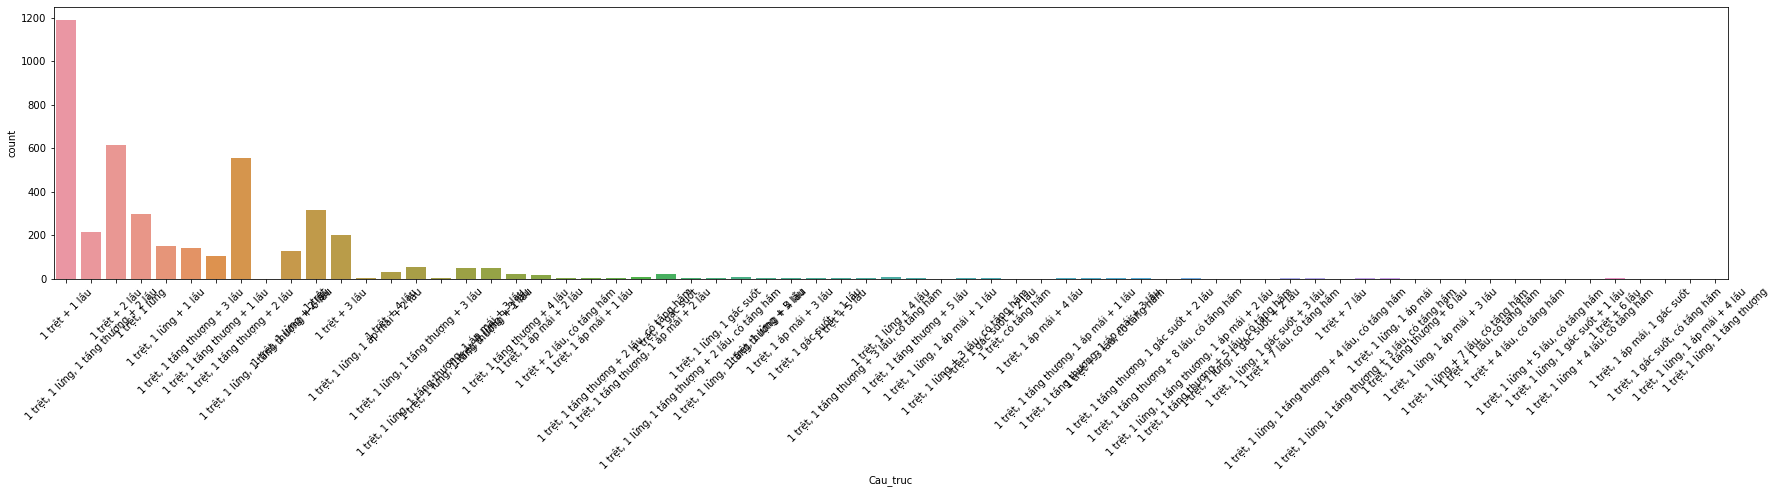

In [135]:
plt.figure(figsize=(30,5))
sns.countplot(data=pdf.toPandas(), x='Cau_truc')
plt.xticks(rotation=45)

<p class=summary>Summary</p>
<p>From the figure, we can see that all house type has a ground ('Trệt'), some have floors ('lầu') and basement (some of them). So we will separte <kbd>Tien_ich</kbd> column into 3 columns: num_floor (contain numbers of floors), basement (Yes or No)</p>

In [108]:
# def get_matching_string(line, regex):
#     matches = re.findall('(\d+\slầu)', line)
#     return matches if matches else None
# udf_func = udf(lambda line, '(\d+\slầu)': get_matching_string(line, '(\d+\slầu)'),
#                StringType())

In [109]:
import pyspark.pandas as ps

In [110]:
pdf=pdf.withColumn('num_floors', expr("regexp_extract(Cau_truc, '(\\\\d+)\\\\s+(lầu)', 0)"))
pdf.show(5)

+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+---------------+---------------+-------------+----------+
|    ID|            Noi_dung|             Dia_chi|  Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|          Duong|         Phuong|         Quan|num_floors|
+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+---------------+---------------+-------------+----------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...| 3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|             0|Gần chợ, siêu thị...|  ấp thới tây 2|    Xã Tân

In [111]:
pdf=pdf.withColumn('num_floors', regexp_replace('num_floors', 'lầu', ''))
pdf.show(3)

+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+----------+
|    ID|            Noi_dung|             Dia_chi| Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|         Duong|     Phuong|         Quan|num_floors|
+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+----------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...|3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|             0|Gần chợ, siêu thị...| ấp thới tây 2|Xã Tân Hiệp|Huyện Hóc Môn|    

In [112]:
pdf=pdf.withColumn('basement', expr("regexp_extract(Cau_truc, '(hầm)', 0)"))
pdf.show(20)

+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+----------+--------+
|    ID|            Noi_dung|             Dia_chi|  Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|             Duong|              Phuong|           Quan|num_floors|basement|
+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+----------+--------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...| 3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|     

<h3 style='color:orange'>Check Values of separated columns, Replace Null Values</h3>

In [113]:
pdf.select(countDistinct("basement")).show(), pdf.select('basement').distinct().show()

+------------------------+
|count(DISTINCT basement)|
+------------------------+
|                       2|
+------------------------+

+--------+
|basement|
+--------+
|     hầm|
|        |
+--------+



(None, None)

<p class=summary> Basement has 2 value 'hầm' and null. So We will convert it into True and False or Yes and No</p>

In [114]:
p = pdf.withColumn('basement', regexp_replace('basement', '\s+', 'No'))
p.select('basement').distinct().show()

+--------+
|basement|
+--------+
|     hầm|
|        |
+--------+



In [115]:
pdf=pdf.withColumn("basement", \
       when(col("basement")=="" ,None) \
          .otherwise(col("basement")))

In [116]:
pdf.select(countDistinct("num_floors")).show(), pdf.select('num_floors').distinct().show()

+--------------------------+
|count(DISTINCT num_floors)|
+--------------------------+
|                         9|
+--------------------------+

+----------+
|num_floors|
+----------+
|        3 |
|        2 |
|        5 |
|        1 |
|        6 |
|          |
|        4 |
|        7 |
|        8 |
+----------+



(None, None)

<h3 style='color:orange'>Replace Empty String by Null</h3> 

In [117]:
pdf=pdf.withColumn("num_floors", \
       when(col("num_floors")=="" ,None) \
          .otherwise(col("num_floors")))
pdf.show()

+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+----------+--------+
|    ID|            Noi_dung|             Dia_chi|  Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|             Duong|              Phuong|           Quan|num_floors|basement|
+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+----------+--------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...| 3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|     

In [118]:
Dict_Null = {col:pdf.filter(pdf[col].isNull()|isnan(pdf[col])).count() for col in pdf.columns}
Dict_Null

{'ID': 0,
 'Noi_dung': 0,
 'Dia_chi': 0,
 'Gia': 0,
 'Nha_ve_sinh': 0,
 'So_phong': 0,
 'Huong': 0,
 'Chieu_dai': 0,
 'Rong': 0,
 'Giay_to': 0,
 'Cau_truc': 0,
 'Dien_tich': 0,
 'Dien_tich_su_dung': 0,
 'Hem_rong': 0,
 'Duong_mat_tien': 0,
 'Tien_ich': 813,
 'Duong': 0,
 'Phuong': 0,
 'Quan': 0,
 'num_floors': 648,
 'basement': 4249}

<h3 style='color:orange'>Fill NA</h3>

In [120]:
pdf=pdf.na.fill(value='No',subset=["basement"])
pdf.show()

+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+----------+--------+
|    ID|            Noi_dung|             Dia_chi|  Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|             Duong|              Phuong|           Quan|num_floors|basement|
+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+----------+--------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...| 3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|     

<h3 style='color:orange'>Drop uneccessary Columns</h3>

In [121]:
pdf=pdf.drop("Tien_ich")
pdf.show()

+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+------------------+--------------------+---------------+----------+--------+
|    ID|            Noi_dung|             Dia_chi|  Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|             Duong|              Phuong|           Quan|num_floors|basement|
+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+------------------+--------------------+---------------+----------+--------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...| 3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|             0|     ấp thới tây 2|         Xã Tân Hiệp|  Huyện Hóc M

In [122]:
pdf=pdf.drop(*('Noi_dung', 'Dia_chi'))

In [123]:
pdf.show()

+------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+------------------+--------------------+---------------+----------+--------+
|    ID|  Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|             Duong|              Phuong|           Quan|num_floors|basement|
+------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+------------------+--------------------+---------------+----------+--------+
|149065| 3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|             0|     ấp thới tây 2|         Xã Tân Hiệp|  Huyện Hóc Môn|        1 |      No|
|205270| 3800|          2|       2|Đ.Bắc|    14.35| 5.0|Sổ hồng|      1 trệt + 1 lầu|     71.8|            137.6|     5.0|             0|    huỳ

<h3 style='color:orange'>Check and remove Dupplicates</h3>

In [124]:
print('Before drop duplicates: ', pdf.count())
pdf=pdf.dropDuplicates()
print('After drop duplicates: ', pdf.count())

Before drop duplicates:  4285
After drop duplicates:  4285


<h3 style='color:orange'>Check and Remove Outliers</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd31f323610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3310e88d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd31f323290>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3310e8310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3310e8390>],
 'means': []}

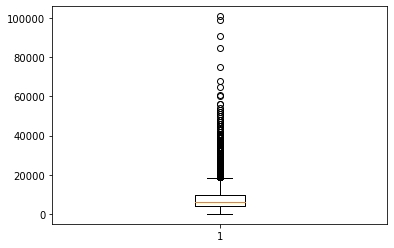

In [139]:
plt.boxplot(pdf.select('Gia').toPandas())

<p class=summary>Summary</p>
We can check numbers of outliers presented in the data.
If number of outliers is aceptable (maybe less than 5% of data size), we could removed it.
But in case of the number is large (for instance 20%), if removed outliers, we will loss a lot of records. In this situation, we can remain them and apply appropriate scaler before apply model.

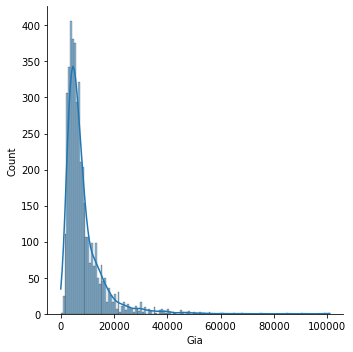

In [142]:
sns.displot(pdf.toPandas()['Gia'], kde=True)

In [143]:
scale_gia = pdf.withColumn('log_Gia', log(col('Gia')))
scale_gia.show()

+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+------------------+
|    ID|            Noi_dung|             Dia_chi|  Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|             Duong|              Phuong|           Quan|           log_Gia|
+------+--------------------+--------------------+-----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+------------------+--------------------+---------------+------------------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...| 3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|        

In [144]:
mean_val=scale_gia.agg({'log_Gia':'mean'}).collect()[0][0]
std_val=scale_gia.agg({'log_Gia':'std'}).collect()[0][0]
mean_val, std_val

(8.778205478809763, 0.680043762537872)

In [146]:
high_bound = mean_val + (3*std_val)
low_bound = mean_val - (3*std_val)
high_bound, low_bound

(10.818336766423378, 6.738074191196147)

<h3 style='color:orange'>Remove Outliers</h3>

In [149]:
scale_gia = scale_gia.where((scale_gia['log_Gia']<high_bound) & (scale_gia['log_Gia']>low_bound))

In [150]:
scale_gia.count()

4266

<h1 class=head>Build Model with Spark</h1>

<h3 style='color:orange'>Apply Scaler for other numeric columns</h3>

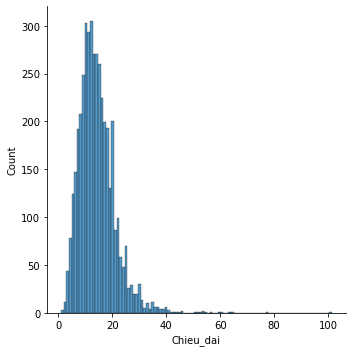

In [160]:
sns.displot(pdf.toPandas()['Chieu_dai'])

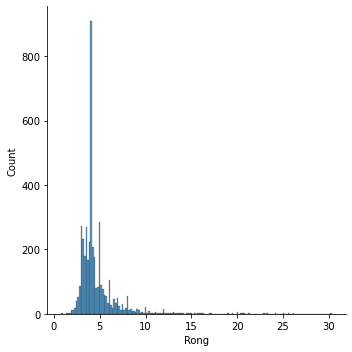

In [161]:
sns.displot(pdf.toPandas()['Rong'])

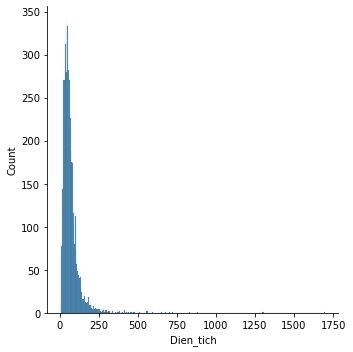

In [162]:
sns.displot(pdf.toPandas()['Dien_tich'])

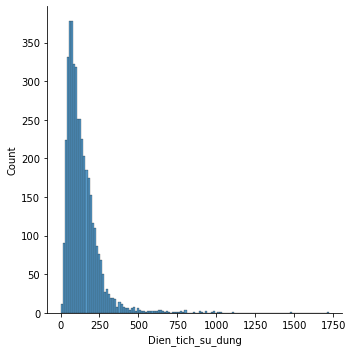

In [163]:
sns.displot(pdf.toPandas()['Dien_tich_su_dung'])

In [183]:
pdf=pdf.withColumn('log_Gia', log(col('Gia')))
pdf.show(3)

+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+------------------+------------------+-----------------+
|    ID|            Noi_dung|             Dia_chi| Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|         Duong|     Phuong|         Quan|     log_Chieudai|     log_Chieurong|      log_Dientich|          log_Gia|
+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+------------------+------------------+-----------------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...|3700|

In [167]:
pdf=pdf.withColumn('log_Chieudai', log(col('Chieu_dai')))
pdf.show(3)

+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+
|    ID|            Noi_dung|             Dia_chi| Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|         Duong|     Phuong|         Quan|     log_Chieudai|
+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...|3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|             0|Gần chợ, siêu thị...| ấp thới tây 2|Xã Tân Hi

In [168]:
pdf=pdf.withColumn('log_Chieurong', log(pdf['Rong']))
pdf.show(3)

+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+------------------+
|    ID|            Noi_dung|             Dia_chi| Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|         Duong|     Phuong|         Quan|     log_Chieudai|     log_Chieurong|
+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+------------------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...|3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|      1 trệt + 1 lầu|    104.5|            134.7|     5.0|   

In [169]:
pdf=pdf.withColumn('log_Dientich', log(pdf['Dien_tich']))
pdf.show(3)

+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+------------------+------------------+
|    ID|            Noi_dung|             Dia_chi| Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|         Duong|     Phuong|         Quan|     log_Chieudai|     log_Chieurong|      log_Dientich|
+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+------------------+------------------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...|3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|    

In [170]:
pdf=pdf.drop('Dien_tich_sudung')
pdf.show(3)

+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+------------------+------------------+
|    ID|            Noi_dung|             Dia_chi| Gia|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Rong|Giay_to|            Cau_truc|Dien_tich|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|            Tien_ich|         Duong|     Phuong|         Quan|     log_Chieudai|     log_Chieurong|      log_Dientich|
+------+--------------------+--------------------+----+-----------+--------+-----+---------+----+-------+--------------------+---------+-----------------+--------+--------------+--------------------+--------------+-----------+-------------+-----------------+------------------+------------------+
|149065|Bán nhà 134.7m2 T...|Đường ấp Thới Tây...|3700|          4|       3|Đ.Bắc|    20.71| 5.0|Sổ hồng|    

<AxesSubplot:>

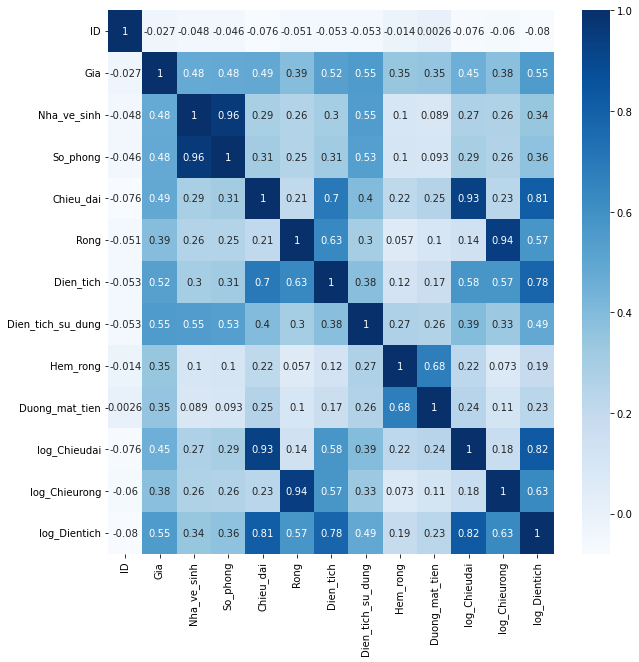

In [172]:
plt.figure(figsize=(10,10))
sns.heatmap(pdf.toPandas().corr(), cmap='Blues', annot=True)

<h3 style='color:orange'>Encoder for Text Columns</h3>

In [173]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

In [194]:
data = pdf.drop(*('ID','Gia','Noi_dung', 'Dia_chi', 'Tien_ich', 'Chieu_rong', 'Rong', 'Dien_tich', 'Dien_tich_su_sung', 'Cau_truc'))
data.printSchema()

root
 |-- Nha_ve_sinh: integer (nullable = true)
 |-- So_phong: integer (nullable = true)
 |-- Huong: string (nullable = true)
 |-- Chieu_dai: double (nullable = true)
 |-- Giay_to: string (nullable = true)
 |-- Dien_tich_su_dung: double (nullable = true)
 |-- Hem_rong: double (nullable = true)
 |-- Duong_mat_tien: integer (nullable = true)
 |-- Duong: string (nullable = true)
 |-- Phuong: string (nullable = true)
 |-- Quan: string (nullable = true)
 |-- log_Chieudai: double (nullable = true)
 |-- log_Chieurong: double (nullable = true)
 |-- log_Dientich: double (nullable = true)
 |-- log_Gia: double (nullable = true)



In [195]:
columnList = [field.name for field in data.schema.fields if isinstance(
    field.dataType, StringType)]
columnList

['Huong', 'Giay_to', 'Duong', 'Phuong', 'Quan']

In [196]:
for c in columnList:
    data = data.withColumn(c, lower(col(c)))

<h3 style='color:orange'>Apply Scaler for other numeric columns</h3>

In [197]:
# data = data.drop('ID')
data.printSchema()

root
 |-- Nha_ve_sinh: integer (nullable = true)
 |-- So_phong: integer (nullable = true)
 |-- Huong: string (nullable = true)
 |-- Chieu_dai: double (nullable = true)
 |-- Giay_to: string (nullable = true)
 |-- Dien_tich_su_dung: double (nullable = true)
 |-- Hem_rong: double (nullable = true)
 |-- Duong_mat_tien: integer (nullable = true)
 |-- Duong: string (nullable = true)
 |-- Phuong: string (nullable = true)
 |-- Quan: string (nullable = true)
 |-- log_Chieudai: double (nullable = true)
 |-- log_Chieurong: double (nullable = true)
 |-- log_Dientich: double (nullable = true)
 |-- log_Gia: double (nullable = true)



In [198]:
data.show(3)

+-----------+--------+-----+---------+-------+-----------------+--------+--------------+--------------+-----------+-------------+-----------------+------------------+------------------+-----------------+
|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Giay_to|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|         Duong|     Phuong|         Quan|     log_Chieudai|     log_Chieurong|      log_Dientich|          log_Gia|
+-----------+--------+-----+---------+-------+-----------------+--------+--------------+--------------+-----------+-------------+-----------------+------------------+------------------+-----------------+
|          4|       3|đ.bắc|    20.71|sổ hồng|            134.7|     5.0|             0| ấp thới tây 2|xã tân hiệp|huyện hóc môn|3.030616675407493|1.6094379124341003|4.6491870714048655|8.216088098632316|
|          2|       2|đ.bắc|    14.35|sổ hồng|            137.6|     5.0|             0|huỳnh tấn phát|xã phú xuân| huyện nhà bè| 2.66374994220563|1.6094379124341003| 4.273884476054178

In [208]:
columnList

['Huong', 'Giay_to', 'Duong', 'Phuong', 'Quan']

In [215]:

string_indexer_1 = StringIndexer(inputCol='Huong', outputCol='Huong_index')
data_index=string_indexer_1.fit(data).transform(data)
string_indexer_2 = StringIndexer(inputCol='Giay_to', outputCol='Giayto_index')
data_index=string_indexer_2.fit(data_index).transform(data_index)
string_indexer_3 = StringIndexer(inputCol='Phuong', outputCol='Phuong_index')
data_index=string_indexer_3.fit(data_index).transform(data_index)
string_indexer_4 = StringIndexer(inputCol='Quan', outputCol='Quan_index')
data_index=string_indexer_4.fit(data_index).transform(data_index)
string_indexer_5 = StringIndexer(inputCol='Duong', outputCol='Duong_index')
data_index=string_indexer_5.fit(data_index).transform(data_index)

In [216]:
data_index.show()

+-----------+--------+-----+---------+-------+-----------------+--------+--------------+------------------+--------------------+---------------+------------------+------------------+------------------+------------------+-----------+------------+------------+----------+-----------+
|Nha_ve_sinh|So_phong|Huong|Chieu_dai|Giay_to|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|             Duong|              Phuong|           Quan|      log_Chieudai|     log_Chieurong|      log_Dientich|           log_Gia|Huong_index|Giayto_index|Phuong_index|Quan_index|Duong_index|
+-----------+--------+-----+---------+-------+-----------------+--------+--------------+------------------+--------------------+---------------+------------------+------------------+------------------+------------------+-----------+------------+------------+----------+-----------+
|          4|       3|đ.bắc|    20.71|sổ hồng|            134.7|     5.0|             0|     ấp thới tây 2|         xã tân hiệp|  huyện hóc môn| 3.0306166

In [222]:
data_index.drop(*('Huong', 'Duong', 'Phuong', 'Quan'))

DataFrame[Nha_ve_sinh: int, So_phong: int, Chieu_dai: double, Giay_to: string, Dien_tich_su_dung: double, Hem_rong: double, Duong_mat_tien: int, log_Chieudai: double, log_Chieurong: double, log_Dientich: double, log_Gia: double, Huong_index: double, Giayto_index: double, Phuong_index: double, Quan_index: double, Duong_index: double]

In [224]:
data_index = data_index.drop(*('Huong', 'Duong', 'Phuong', 'Quan','Giay_to'))
data_index.printSchema()

root
 |-- Nha_ve_sinh: integer (nullable = true)
 |-- So_phong: integer (nullable = true)
 |-- Chieu_dai: double (nullable = true)
 |-- Dien_tich_su_dung: double (nullable = true)
 |-- Hem_rong: double (nullable = true)
 |-- Duong_mat_tien: integer (nullable = true)
 |-- log_Chieudai: double (nullable = true)
 |-- log_Chieurong: double (nullable = true)
 |-- log_Dientich: double (nullable = true)
 |-- log_Gia: double (nullable = true)
 |-- Huong_index: double (nullable = false)
 |-- Giayto_index: double (nullable = false)
 |-- Phuong_index: double (nullable = false)
 |-- Quan_index: double (nullable = false)
 |-- Duong_index: double (nullable = false)



In [225]:
target = 'log_Gia'
features = [c for c in data_index.columns if c != 'log_Gia']

In [226]:
target, features

('log_Gia',
 ['Nha_ve_sinh',
  'So_phong',
  'Chieu_dai',
  'Dien_tich_su_dung',
  'Hem_rong',
  'Duong_mat_tien',
  'log_Chieudai',
  'log_Chieurong',
  'log_Dientich',
  'Huong_index',
  'Giayto_index',
  'Phuong_index',
  'Quan_index',
  'Duong_index'])

In [229]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler( inputCols=features,
outputCol='features')

In [246]:
data_model = assembler.transform(data_index)

In [247]:
data_model.show()

+-----------+--------+---------+-----------------+--------+--------------+------------------+------------------+------------------+------------------+-----------+------------+------------+----------+-----------+--------------------+
|Nha_ve_sinh|So_phong|Chieu_dai|Dien_tich_su_dung|Hem_rong|Duong_mat_tien|      log_Chieudai|     log_Chieurong|      log_Dientich|           log_Gia|Huong_index|Giayto_index|Phuong_index|Quan_index|Duong_index|            features|
+-----------+--------+---------+-----------------+--------+--------------+------------------+------------------+------------------+------------------+-----------+------------+------------+----------+-----------+--------------------+
|          4|       3|    20.71|            134.7|     5.0|             0| 3.030616675407493|1.6094379124341003|4.6491870714048655| 8.216088098632316|        2.0|         0.0|       106.0|      20.0|      238.0|[4.0,3.0,20.71,13...|
|          2|       2|    14.35|            137.6|     5.0|         

In [249]:
df = data_model.select(['features', 'log_Gia'])
df.show(3)

+--------------------+-----------------+
|            features|          log_Gia|
+--------------------+-----------------+
|[4.0,3.0,20.71,13...|8.216088098632316|
|[2.0,2.0,14.35,13...|8.242756345714477|
|[5.0,5.0,10.0,70....|8.779557455883728|
+--------------------+-----------------+
only showing top 3 rows



In [253]:
from pyspark.ml.feature import PCA
pca = PCA(k=2,inputCol='features', outputCol='pcaFeature')

In [275]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(df)

result =  model.transform(df)
result.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------+------------------+------------------------------------------------------------+
|features                                                                                                      |log_Gia           |pcaFeatures                                                 |
+--------------------------------------------------------------------------------------------------------------+------------------+------------------------------------------------------------+
|[4.0,3.0,20.71,134.7,5.0,0.0,3.030616675407493,1.6094379124341003,4.6491870714048655,2.0,0.0,106.0,20.0,238.0]|8.216088098632316 |[-247.76254228944742,-126.4303787227702,96.25393882166678]  |
|[2.0,2.0,14.35,137.6,5.0,0.0,2.66374994220563,1.6094379124341003,4.273884476054178,2.0,0.0,18.0,9.0,0.0]      |8.242756345714477 |[-6.140719531523224,-137.94307071195269,18.606046477786403] |
|[5.0,5.0,10.0,70.3,5.0,1.0,2.30258

In [290]:
# Train Test split
train_data, test_data = result.dropna().randomSplit([0.75, 0.25])

In [291]:
from pyspark.ml.regression import LinearRegression 
lr = LinearRegression(featuresCol='pcaFeatures', labelCol='log_Gia', predictionCol='predictions')

In [296]:
test_result = lr.fit(train_data).transform(test_data)

23/01/29 16:51:56 WARN Instrumentation: [eab128be] regParam is zero, which might cause numerical instability and overfitting.


In [298]:
test_result.select('predictions').show()

+-----------------+
|      predictions|
+-----------------+
|  8.3622154244786|
|8.436752166519149|
|8.368945875827675|
|8.466321628898681|
|8.430237760972132|
|8.415848021505697|
|8.526465801475354|
|  8.5776190942604|
|8.661837259077728|
|8.732568027341568|
|8.522351067115077|
|8.513500627305717|
| 8.52131114400204|
|8.536782943744027|
|8.725549297955144|
|8.514986413753892|
|9.065194637470274|
|8.368939517303058|
|8.479032983775554|
|8.390393753221492|
+-----------------+
only showing top 20 rows

